# Prediction of Applications at MoreJobs4You

###### Data Source:
* job_description.csv : Contains features describing the job description itself (from the visits by users.csv) 
* users.csv : Contains features describing the users (names anonymized)


##### Import Packages 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
job_desc = pd.read_csv('../job_desc.csv')
job_desc.head()

,job_title_full,salary,company,user_id
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1
1,Junior Product Manager - Mobile,70000.0,b,U2
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4
4,Online Marketing Manager,64000.0,h,U5


In [9]:
users = pd.read_csv('../user.csv')
print(users.columns)
users.head()

Index(['user_id', 'has_applied', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23',
       'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v3', 'v30', 'v31', 'v32',
       'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v4', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v5', 'v50',
       'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v6', 'v7', 'v8', 'v9'],
      dtype='object')


,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,...,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,...,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669
3,U4,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0.407412,0.242282,0.097724,0.191388,0.516972,0.742984,0.232344,0.305115,0.080069,0.297233
4,U5,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0.605605,0.772735,0.351836,0.932708,0.724384,0.123647,0.091980,0.581444,0.093941,0.612623


#### Joining two tables

In [10]:
df = job_desc.join(users, lsuffix="", rsuffix="_users")
df.columns

Index(['job_title_full', 'salary', 'company', 'user_id', 'user_id_users',
       'has_applied', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16',
       'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25',
       'v26', 'v27', 'v28', 'v29', 'v3', 'v30', 'v31', 'v32', 'v33', 'v34',
       'v35', 'v36', 'v37', 'v38', 'v39', 'v4', 'v40', 'v41', 'v42', 'v43',
       'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v5', 'v50', 'v51', 'v52',
       'v53', 'v54', 'v55', 'v56', 'v6', 'v7', 'v8', 'v9'],
      dtype='object')

In [11]:
df = df.drop('user_id_users', axis=1)
df = df.drop('user_id', axis=1)

#### Converting job_title_full to some numerical values

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
transform = TfidfTransformer()

#Convert text to count vectors
vec_count_fit = cv.fit(df.job_title_full)
vec_count_transform = cv.transform(df.job_title_full)
#Convert count to tf idf
vec_encode = transform.fit_transform(vec_count_transform)
vec_encode.toarray().shape

vec_enc = pd.DataFrame(vec_encode.toarray(), columns=vec_count_fit.get_feature_names())
vec_enc.head()

,affairs,ai,analyst,apac,audit,backend,big,brand,business,checkout,...,seo,shop,software,supplier,sustainability,team,transformation,ui,ux,ventures
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.584557,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.472919,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Adding the encoded dataframe to original dataframe

In [14]:
# df = df.reset_index(drop=True).merge(vec_enc.reset_index(drop=True), left_index=True, right_index=True, how='left')
df = df.join(vec_enc)

In [15]:
df

,job_title_full,salary,company,has_applied,v1,v10,v11,v12,v13,v14,...,seo,shop,software,supplier,sustainability,team,transformation,ui,ux,ventures
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,Junior Product Manager - Mobile,70000.0,b,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,1,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,Online Marketing Manager,64000.0,h,1,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Marketing Manager - (Remote) m/f/d,52000.0,a,0,0.361430,0.021262,0.500138,0.274166,0.891627,0.034402,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1996,Lead Business Development Manager,NaN,f,1,0.771731,0.765751,0.443425,NaN,NaN,0.247823,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1997,UI Designer m/f/d,NaN,g,1,0.818051,NaN,0.699326,0.847761,0.846339,0.788210,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.000000
1998,Lead Brand Manager - New Ventures,NaN,f,1,0.800922,0.752295,0.934636,0.774046,0.954929,0.469006,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.435762


In [22]:
# replace NaN with -999
df = df.fillna(-999)

In [30]:
# dataframe with out text 
features = df.drop(['job_title_full', 'has_applied'], axis=1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features['company'] = labelencoder.fit_transform(features['company'])
features.head()

,salary,company,v1,v10,v11,v12,v13,v14,v15,v16,...,seo,shop,software,supplier,sustainability,team,transformation,ui,ux,ventures
0,51000.0,6,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,70000.0,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59000.0,6,0.240756,0.546440,0.521399,0.402420,0.640444,-999.000000,0.184515,0.395058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-999.0,3,0.004854,0.433188,0.250801,0.242680,0.713586,0.210186,0.977472,0.375024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64000.0,7,0.835250,0.476812,0.764354,0.449753,0.524924,0.807181,0.294023,0.475043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split as tts
y = df.has_applied
X = features
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=27)

#### Classification Model

In [81]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=200)
RF_model = RandomForestClassifier()

In [82]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
RF_prediction = RF_model.predict(X_test)

In [84]:
# Accuracy

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, SVC_prediction))
print(roc_auc_score(y_test, KNN_prediction))
print(roc_auc_score(y_test, RF_prediction))

0.6028001037075448
0.6603289833779853
0.6653703223576182


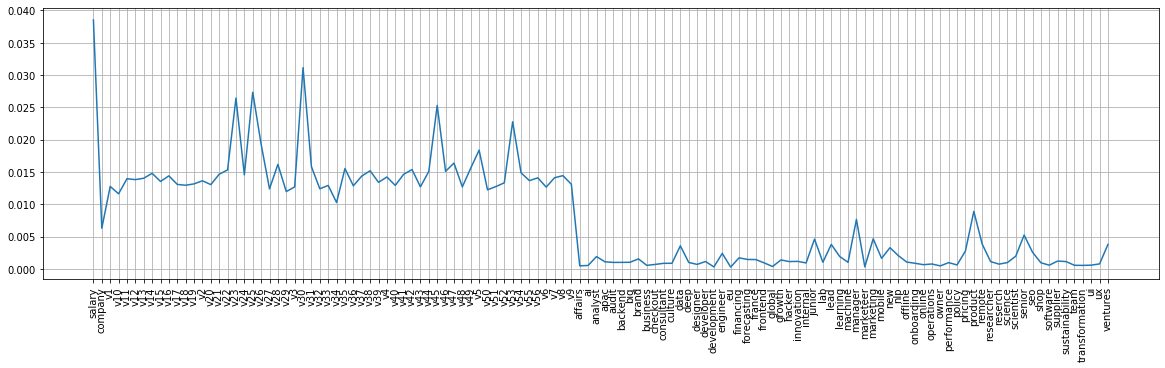

In [87]:
plt.figure(figsize=[20,5])
plt.plot(RF_model.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.to_list(), rotation=90)
plt.grid(axis='both')

* It reflects that the words like senior, junior, product, manager, data, mobile, marekting, engineer and analyst affect the application decision.
* And the salary information also shows high relativity to the decision 